In [1]:
# Import req lib

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# Read the csv file

df = pd.read_csv('/content/Google_Stock_Price_Train (1).csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
# Checking for null values

df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [4]:
# Checking datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


<Axes: >

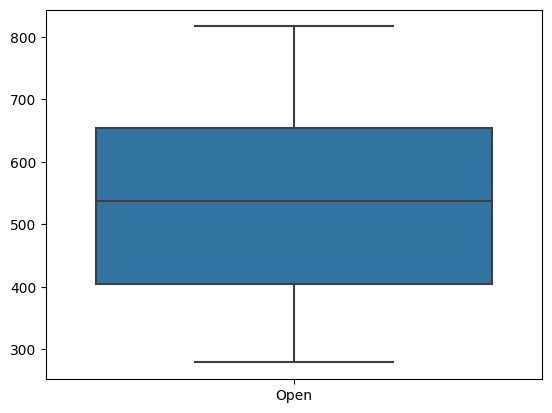

In [7]:
import seaborn as sns
sns.boxplot(df.iloc[:,1:2])

In [8]:
# Selecting the column for LSTM model

train = df.iloc[:,1:2].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [9]:
# Normalization

from sklearn.preprocessing import MinMaxScaler

In [10]:
sc = MinMaxScaler()
sc_train = sc.fit_transform(train)
sc_train

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
"""

Data = 1,2,3,4,5,6,7,8,9,10    t(timestamp)=3

Input for LSTM Model
C1  C2  C3  O/P
1   2   3    4
2   3   4    5
3   4   5    6
4   5   6    7
5   6   7    8
6   7   8    9
7   8   9    10

Output for LSTM

8   9   10   11

"""

In [11]:
len(sc_train)

1258

In [12]:
# Splitting the data

x_train = []
y_train = []

for i in range(60,1258):  # t=60
  x_train.append(sc_train[i-60:i,0])  # [:,:]
  y_train.append(sc_train[i,0])

In [13]:
x_train

[array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656]),
 array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.

In [14]:
y_train

[0.08627874097775134,
 0.08471612471166012,
 0.07454051640747084,
 0.07883771113922167,
 0.07238261775429711,
 0.06663442220403304,
 0.06315574075452046,
 0.06782498697819772,
 0.06823424361931696,
 0.07601011980058048,
 0.08082818662102831,
 0.058077237889723854,
 0.044683384180370544,
 0.044218319815462426,
 0.04202321601309622,
 0.04070243321675715,
 0.030173375995237728,
 0.03512166083785995,
 0.040460599747005,
 0.046859885408140456,
 0.050673413200386985,
 0.04879455316615822,
 0.04027457400104173,
 0.03787484187811596,
 0.045669320633975774,
 0.04224644690825208,
 0.03212664632785178,
 0.04187439541632565,
 0.043083562765086625,
 0.04877595059156181,
 0.04635761589403975,
 0.03748418781159313,
 0.041706972244958784,
 0.053407991666046595,
 0.06810402559714268,
 0.060011905647741615,
 0.03722375176724457,
 0.04920380980727734,
 0.03828409851923509,
 0.04524146141826024,
 0.03768881613215269,
 0.03287074931170475,
 0.025783168390505318,
 0.026304040479202317,
 0.010622070094501002

In [15]:
# Convert list into array

x_train, y_train = np.array(x_train),np.array(y_train)

In [16]:
x_train.shape

(1198, 60)

In [17]:
# (1198, 60) to (1198, 60, 1)

x_train = np.reshape(x_train,(1198, 60, 1))

In [18]:
x_train.shape

(1198, 60, 1)

In [20]:
# Building LSTM model

model = Sequential()
model.add(LSTM(50, input_shape=(60,1),return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(Dense(1))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dense (Dense)               (None, 60, 1)             51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',loss='mse')

In [23]:
model.fit(x_train,y_train,batch_size=30,epochs=10)

Epoch 1/10
40/40 [==============================] - 10s 84ms/step - loss: 0.1237
Epoch 2/10
40/40 [==============================] - 4s 102ms/step - loss: 0.0828
Epoch 3/10
40/40 [==============================] - 4s 93ms/step - loss: 0.0807
Epoch 4/10
40/40 [==============================] - 3s 83ms/step - loss: 0.0805
Epoch 5/10
40/40 [==============================] - 5s 115ms/step - loss: 0.0792
Epoch 6/10
40/40 [==============================] - 4s 105ms/step - loss: 0.0780
Epoch 7/10
40/40 [==============================] - 3s 86ms/step - loss: 0.0772
Epoch 8/10
40/40 [==============================] - 3s 83ms/step - loss: 0.0768
Epoch 9/10
40/40 [==============================] - 5s 114ms/step - loss: 0.0764
Epoch 10/10
40/40 [==============================] - 3s 85ms/step - loss: 0.0765


In [24]:
x_train[0]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.01642607],
       [0.02100231],
       [0.02280676],
       [0.02273235],
       [0.02810849],
       [0.03212665],
       [0.0433812 ],
       [0.04475779],
       [0.04790163],
       [0.0440695 ],
       [0.04648783],
       [0.04745517],
       [0.04873875],
       [0.03936305],
       [0.04137213],
       [0.04034898],
       [0.04784582],
       [0.04325099],
       [0.04356723],
       [0.04286033],
       [0.04602277],
       [0.05398467],
       [0.05738894],
       [0.05714711],
       [0.05569611],
       [0.04421832],
       [0.04514845],
       [0.04605997],
       [0.04412531],
       [0.036

In [26]:
model.predict(x_train[0])

2/2 [==============================] - 2s 8ms/step


array([[[0.23077947]],

       [[0.23085827]],

       [[0.23083943]],

       [[0.23081994]],

       [[0.23073742]],

       [[0.23062795]],

       [[0.23058712]],

       [[0.23063755]],

       [[0.2306051 ]],

       [[0.23064256]],

       [[0.23060748]],

       [[0.23070148]],

       [[0.23037085]],

       [[0.23034117]],

       [[0.23034328]],

       [[0.23028535]],

       [[0.2302489 ]],

       [[0.230241  ]],

       [[0.23028895]],

       [[0.23032138]],

       [[0.23033419]],

       [[0.23033369]],

       [[0.23037177]],

       [[0.23040026]],

       [[0.23047993]],

       [[0.23048967]],

       [[0.2305119 ]],

       [[0.23048481]],

       [[0.23050192]],

       [[0.23050874]],

       [[0.23051783]],

       [[0.2304515 ]],

       [[0.23046571]],

       [[0.23045847]],

       [[0.23051152]],

       [[0.23047903]],

       [[0.23048124]],

       [[0.23047626]],

       [[0.23049864]],

       [[0.23055491]],

       [[0.23057899]],

       [[0.23057

In [27]:
model.save('lstm.h5')